In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# scipyサンプル 
# (http://kaisk.hatenadiary.com/entry/2015/02/17/192955)
from scipy import stats # 正規分布

In [211]:
# rvs (Random variates) 確率変数
x = stats.norm.rvs(loc=0, scale=1, size=1000)  # loc: 期待値 / scale: 標準偏差 / size: サンプル数
x1 = stats.norm.rvs(loc=-1, scale=0.5, size=(1000,1))  # loc: 期待値 / scale: 標準偏差 / size: サンプル数
x2 = stats.norm.rvs(loc=1, scale=0.5, size=(1000,1))  # loc: 期待値 / scale: 標準偏差 / size
x3 = stats.norm.rvs(loc=0.5, scale=0.5, size=(1000,1))  # loc: 期待値 / scale: 標準偏差 / size: サンプル数
x4 = stats.norm.rvs(loc=-0.5, scale=0.5, size=(1000,1))  # loc: 期待値 / scale: 標準偏差 / size: サンプル数

# 正規分布をプロット
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

N = 5

means = np.random.randn(N,2) * 10 + np.array([100, 200])
stdev = np.random.randn(N,2) * 10 + 30
count = np.int64(np.int64(np.random.randn(N,2) * 10000 + 50000))

a = [
    np.hstack([
        np.random.randn(count[i,j]) * stdev[i,j] + means[i,j]
        for j in range(2)])
    for i in range(N)]

In [83]:
limmin = min(np.percentile(x, 0.1) for x in a)
limmax = max(np.percentile(x, 99.9) for x in a)
ls = np.linspace(limmin, limmax, 100)

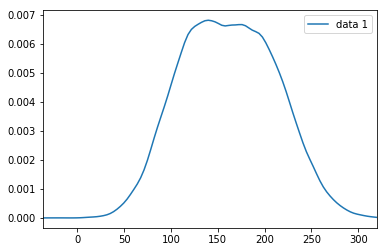

In [106]:
n = 1
x = a[n]
x = x[(x > limmin)&(x < limmax)]
kde = gaussian_kde(x)

# print(ls)
# print(x)
# print(kde(ls))
# print(kde(x))

plt.plot(ls, kde(ls), label='data %d' % n)
plt.legend()
plt.xlim([limmin, limmax])
plt.show()


In [127]:
# 2次元単一正規分布の確率密度関数
rvs = np.append(x1, x2, axis=1)
kde = stats.kde.gaussian_kde(rvs.T)

In [132]:
# 配列同士の結合（np.r_）
#  (https://deepage.net/features/numpy-cr.html)

x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():128j]  # rvs[:,0]を128分割した１次元配列
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():128j]  # rvs[:,0]を128分割した１次元配列
x,y = np.meshgrid(x_flat,y_flat)  # ヒートマップ表示用の２次元グリッド作成

grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
z = kde(grid_coords.T)  # ２次元グリッド 各点の確率密度を取得
z = z.reshape(128,128)

plt.xlim(0, 128)
plt.ylim(0, 128)

aspect_val = x_flat.ptp() / y_flat.ptp()  # ptp: 値の範囲(最大値-最小値)

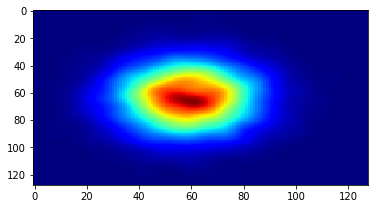

In [135]:
plt.imshow(
        z,
        aspect=aspect_val,  # aspectで縦横比を調整
        cmap="jet"  # 色の選択（https://matplotlib.org/examples/color/colormaps_reference.html）
    )  
plt.show()

In [147]:
# 2次元混合正規分布の確率密度関数
rvs0 = np.append(x1, x2, axis=0)
rvs1 = np.append(x3, x4, axis=0)
rvs = np.append(rvs0, rvs1, axis=1)
kde = stats.kde.gaussian_kde(rvs.T)

In [223]:
# 配列同士の結合（np.r_）
#  (https://deepage.net/features/numpy-cr.html)

x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():128j]  # rvs[:,0]を128分割した１次元配列
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():128j]  # rvs[:,0]を128分割した１次元配列

# x_flat = np.linspace(rvs[:,0].min(), rvs[:,0].max(), 128)
# y_flat = np.linspace(rvs[:,1].min(), rvs[:,1].max(), 128)


x,y = np.meshgrid(x_flat,y_flat)  # ヒートマップ表示用の２次元グリッド作成

grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
z = kde(grid_coords.T)  # ２次元グリッド 各点の確率密度を取得
z = z.reshape(128,128)

# plt.xlim(0, 128)
# plt.ylim(0, 128)

aspect_val = 0.75  # ptp: 値の範囲(最大値-最小値)

In [222]:
kde(grid_coords.T)

array([7.44987001e-52, 1.64980994e-50, 3.37091646e-49, ...,
       9.59062829e-40, 3.52342315e-41, 1.19429441e-42])

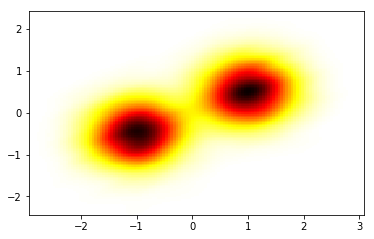

In [226]:
plt.imshow(
        z,
        aspect=aspect_val,  # aspectで縦横比を調整
        cmap="hot_r",  # 色の選択（https://matplotlib.org/examples/color/colormaps_reference.html）
        extent=(x.min(), x.max(), y.min(), y.max())
    )  
plt.show()

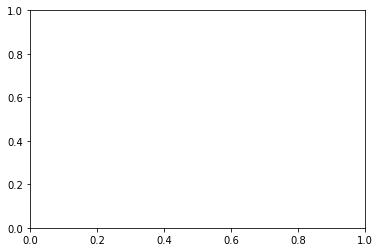

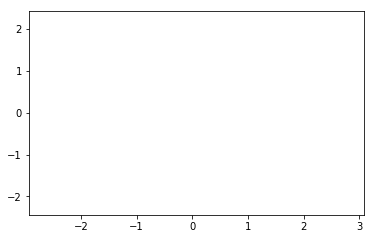

In [167]:
# matplotlib 操作方法
#（https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9）

fig = plt.figure() # Figureオブジェクトを作成
ax = fig.add_subplot(1,1,1) # figに属するAxesオブジェクトを作成
ax.set_xlim(rvs[:,0].min(), rvs[:,0].max())
ax.set_ylim(rvs[:,1].min(), rvs[:,1].max())
ax.imshow(
        z,
        aspect=aspect_val,  # aspectで縦横比を調整
        cmap="hot_r"  # 色の選択（https://matplotlib.org/examples/color/colormaps_reference.html）
    )  
plt.show()

7

In [192]:
print(np.shape(grid_coords))
print(grid_coords)

(16384, 2)
[[-2.93414816 -2.44089029]
 [-2.88681414 -2.44089029]
 [-2.83948011 -2.44089029]
 ...
 [ 2.98260501  2.44986212]
 [ 3.02993903  2.44986212]
 [ 3.07727306  2.44986212]]


In [194]:
x_flat = np.linspace(rvs[:,0].min(), rvs[:,0].max(), 128)
y_flat = np.linspace(rvs[:,1].min(), rvs[:,1].max(), 128)

In [196]:
print(x_flat)
print(y_flat)

[-2.93414816e+00 -2.88681414e+00 -2.83948011e+00 -2.79214608e+00
 -2.74481206e+00 -2.69747803e+00 -2.65014401e+00 -2.60280998e+00
 -2.55547596e+00 -2.50814193e+00 -2.46080791e+00 -2.41347388e+00
 -2.36613986e+00 -2.31880583e+00 -2.27147181e+00 -2.22413778e+00
 -2.17680375e+00 -2.12946973e+00 -2.08213570e+00 -2.03480168e+00
 -1.98746765e+00 -1.94013363e+00 -1.89279960e+00 -1.84546558e+00
 -1.79813155e+00 -1.75079753e+00 -1.70346350e+00 -1.65612948e+00
 -1.60879545e+00 -1.56146143e+00 -1.51412740e+00 -1.46679337e+00
 -1.41945935e+00 -1.37212532e+00 -1.32479130e+00 -1.27745727e+00
 -1.23012325e+00 -1.18278922e+00 -1.13545520e+00 -1.08812117e+00
 -1.04078715e+00 -9.93453121e-01 -9.46119096e-01 -8.98785070e-01
 -8.51451045e-01 -8.04117020e-01 -7.56782994e-01 -7.09448969e-01
 -6.62114944e-01 -6.14780918e-01 -5.67446893e-01 -5.20112868e-01
 -4.72778842e-01 -4.25444817e-01 -3.78110792e-01 -3.30776766e-01
 -2.83442741e-01 -2.36108715e-01 -1.88774690e-01 -1.41440665e-01
 -9.41066394e-02 -4.67726